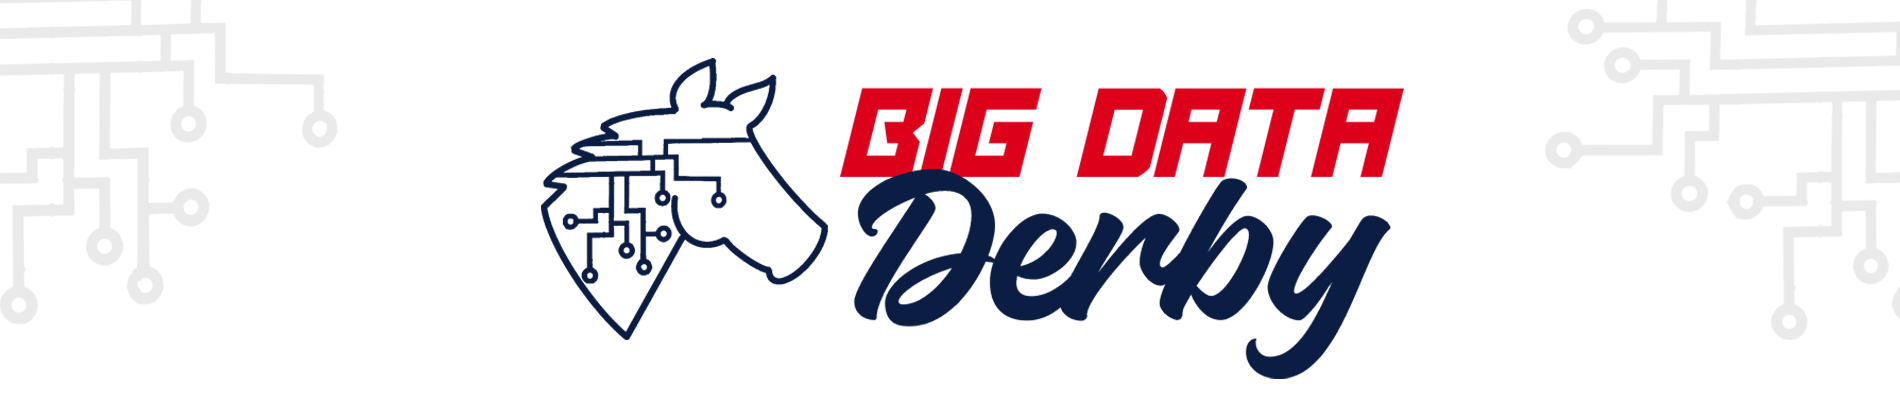

## Goal of the Competition 👑
The goal of this competition is to **analyze horse racing tactics, drafting strategies, and path efficiency.** You will develop a model using never-before-released coordinate data along with basic race information.

Your work will help racing horse owners, trainers, and veterinarians better understand how equine performance and welfare fit together. With better data analysis, equine welfare could significantly improve.

## Infomation of Dataset 📄
- nyra_start_table.csv: horse/jockey race data
- nyra_race_table.csv: racetrack race data
- nyra_tracking_table.csv: tracking data
- nyra_2019_complete.csv: combined table of three above files
<br>

### nyra_start_table.csv: horse/jockey race data
- track_id: 3 character id for the track the race took place at
- race_date: Date the race took place
- race_number: Number of race
- program_number: Program number of the horse in the race passed as 3 characters
- weight_carried: An integer of the weight carried by the horse in the race
- jockey: Name of the jokey on the horse in the race
- odds: odds to win the race passed as an integer

### nyra_race_table.csv: racetrack race data
- track_id: 3 character id for the track the race took place at
- race_date: Date the race took place
- race_number: Number of race
- distance_id: Distance of the race in furlongs passed as an integer
- course_type: The course the race was run over passed as one character
- trak_condition: The condition of the course the race was run on passed as three characters
- run_up_distance: Distance in feet of the gate to the start of the race passed as an integer
- race type: The classification of the race passed as as five characters
- purse: Purse in US dollars of the race passed as an money with two decimal places
- post_time: Time of day the race began passed as 5 character

### nyra_tracking_table.csv: tracking fata
- track_id: 3 character id for the track the race took place at
- race_date: Date the race took place
- race_number: Number of race
- program_number: Program number of the horse in the race passed as 3 characters
- trakus_index: The common collection of point if the lat/long of the horse in race passed as an integer
- latitude: The latitude of the horse in the race passed as a float
- longitude: The longitude of the horse in the race passed as a float

### nyra_2019_complete.csv: combined table of three above files

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px #graphing
import plotly.graph_objects as go #graphing
from plotly.subplots import make_subplots #graphing
import plotly.figure_factory as ff #graphing
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
import missingno as msno #describe data
import os
colors = ["#FFFFFF", "#6CD4FF", "#F7DF00", "#E60000"]

In [4]:
nyra_tracking = pd.read_csv('./nyra_tracking_table.csv')
nyra_start = pd.read_csv('./nyra_start_table.csv')
nyra_race = pd.read_csv('./nyra_race_table.csv')
nyra_2019 = pd.read_csv('./nyra_2019_complete.csv')

/var/folders/md/9n6kyyln37d2ttfz5nklq8540000gn/T/ipykernel_97024/58573605.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  nyra_2019 = pd.read_csv('./nyra_2019_complete.csv')


In [3]:
nyra_2019.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090


In [4]:
nyra_2019.describe().style.background_gradient(cmap = 'Purples')

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,purse,post_time,weight_carried,odds
count,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000
mean,5.505409,183.865213,41.203867,-73.777024,756.315127,67.919189,88878.907779,420.424807,120.713291,1482.919877
std,2.860656,118.332690,0.977123,0.047111,179.688689,38.922712,127824.025516,280.254500,4.351881,1952.415229
min,1.000000,1.000000,40.666711,-73.832601,450.000000,0.000000,16000.000000,100.000000,110.000000,0.000000
25%,3.000000,88.000000,40.673456,-73.828834,600.000000,45.000000,41000.000000,233.000000,118.000000,335.000000
50%,6.000000,176.000000,40.713934,-73.769148,800.000000,54.000000,62000.000000,349.000000,120.000000,730.000000
75%,8.000000,264.000000,40.717393,-73.725636,850.000000,80.000000,80000.000000,516.000000,122.000000,1740.000000
max,13.000000,1062.000000,43.073992,-73.714826,2000.000000,280.000000,1500000.000000,1259.000000,160.000000,19100.000000


In [5]:
nyra_tracking['track_id'].value_counts()

AQU    2158369
BEL    1947134
SAR    1122927
Name: track_id, dtype: int64

In [6]:
nyra_tracking['race_number'].value_counts()

8     582413
6     575217
5     559884
7     554623
4     523846
2     515115
1     508808
9     492915
3     490256
10    283141
11     98804
12     31725
13     11683
Name: race_number, dtype: int64

In [7]:
nyra_tracking['program_number'].value_counts()

4      611396
3      611025
5      606666
2      602597
1      599979
6      579893
7      486905
8      373202
9      266526
10     186835
11     117532
12      71363
1A      56753
13      26507
14      15081
15       7917
2B       4081
16       3591
3X        334
1X        247
Name: program_number, dtype: int64

In [8]:
# Get date detail
nyra_tracking['race_date'] = pd.to_datetime(nyra_tracking['race_date'])
nyra_tracking['day'], nyra_tracking['month'] = nyra_tracking['race_date'].dt.day, nyra_tracking['race_date'].dt.month

### Track Race Plot 🛣

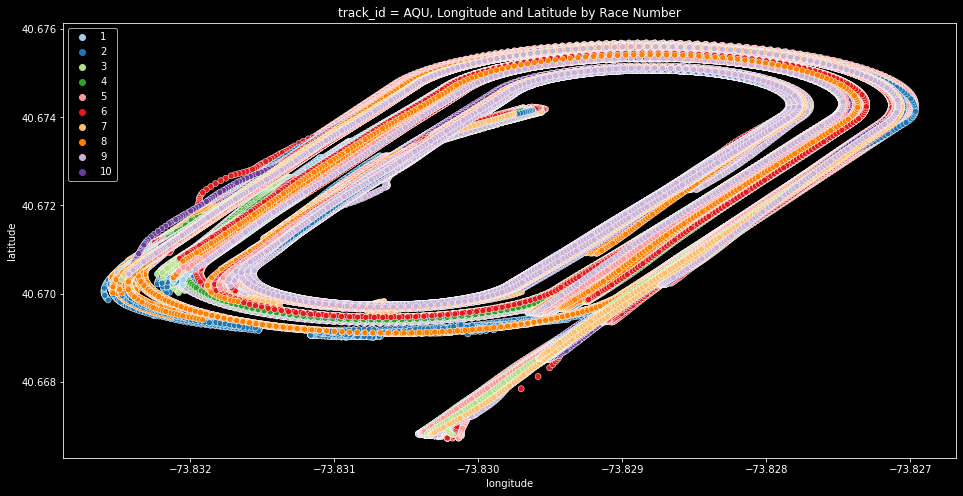

In [21]:
nyra_tracking0 = nyra_tracking[nyra_tracking['track_id'] == "AQU"]
nyra_tracking1 = nyra_tracking[nyra_tracking['month'] == 11]

plt.style.use("dark_background")
plt.figure(figsize=(16, 8))
sns.scatterplot(data=nyra_tracking1, x = 'longitude', y = "latitude", hue = "race_number", palette = "Paired")
plt.title("track_id = AQU, Longitude and Latitude by Race Number")
plt.legend()

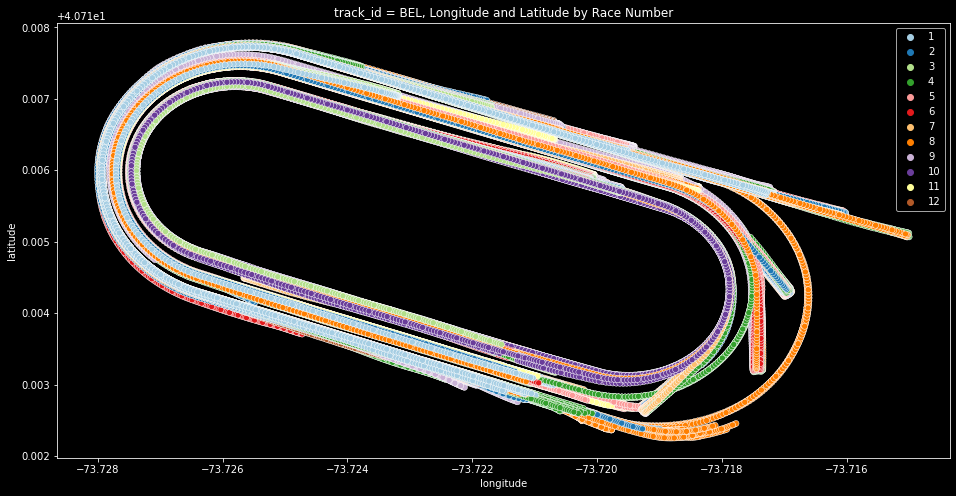

In [15]:
nyra_tracking0 = nyra_tracking[nyra_tracking['track_id'] == "BEL"]
nyra_tracking1 = nyra_tracking[nyra_tracking['month'] == 5]

plt.style.use("dark_background")
plt.figure(figsize=(16, 8))
sns.scatterplot(data=nyra_tracking1, x = 'longitude', y = "latitude", hue = "race_number", palette = "Paired")
plt.title("track_id = BEL, Longitude and Latitude by Race Number")
plt.legend()

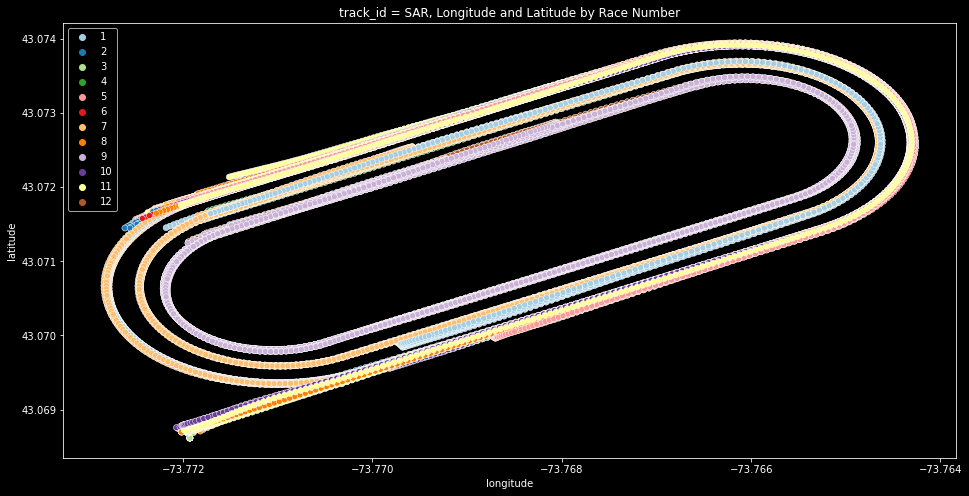

In [13]:
nyra_tracking0 = nyra_tracking[nyra_tracking["track_id"] == "SAR"]
nyra_tracking1 = nyra_tracking0[nyra_tracking0["month"] == 9]

plt.style.use("dark_background")
plt.figure(figsize = (16, 8))
sns.scatterplot(data = nyra_tracking1, x = "longitude", y = "latitude", hue = "race_number", palette = "Paired")

plt.title("track_id = SAR, Longitude and Latitude by Race Number")
plt.legend()

<AxesSubplot:>

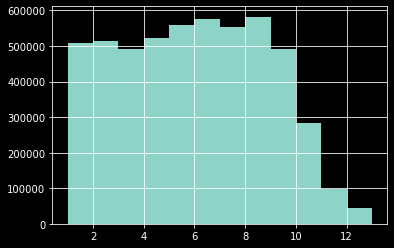

In [19]:
nyra_2019.race_number.hist(bins=12)

### Trakus Index Race Animation 🏎

In [20]:
nyra_2019["jockey"]

0          Andre Shivnarine Worrie
1          Andre Shivnarine Worrie
2          Andre Shivnarine Worrie
3          Andre Shivnarine Worrie
4          Andre Shivnarine Worrie
                    ...           
5228425               Joel Rosario
5228426               Joel Rosario
5228427               Joel Rosario
5228428               Joel Rosario
5228429               Joel Rosario
Name: jockey, Length: 5228430, dtype: object

In [9]:
jockey = nyra_2019[nyra_2019["jockey"] == "Samuel Camacho Jr."]
jockey6 = jockey[jockey["race_number"] == 6]
jockeyBEL = jockey6[jockey6["track_id"] == "BEL"]
jockeyALW = jockeyBEL[jockeyBEL["race_type"] == "ALW"]
jockeyCLM = jockeyBEL[jockeyBEL["race_type"] == "CLM"]
jockeyALW = jockeyALW.sort_values(by = "trakus_index", ascending = True)

fig = px.scatter(jockeyALW, x = "longitude", y = "latitude", hover_data = ["race_type", "track_id"],
                 animation_frame = "longitude",
                 range_y = (min(jockeyALW['latitude']), max(jockeyALW['latitude'])),
                 range_x = (max(jockeyALW['longitude']), min(jockeyALW['longitude'])),
                 #size = "trakus_index",
                 color = "trakus_index", color_continuous_scale = "Turbo", range_color = (0, 299),
                 title = "Samuel Camacho Jr. - Trakus Index,  Race Number = 6,  track_id = BEL")

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.update_traces(marker = dict(symbol = "circle-open", size = 20)) # scaling the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()

In [11]:
nyra_2019['jockey'].value_counts('Samuel Camacho Jr.')

Manuel Franco        0.084925
Dylan Davis          0.072874
Jose Lezcano         0.065948
Junior Alvarado      0.057249
Irad Ortiz Jr.       0.053944
                       ...   
Jose Angel Garcia    0.000054
Jose F. Rojas        0.000051
Luca Panici          0.000049
Kevin Gomez          0.000049
Arienne Cox          0.000048
Name: jockey, Length: 178, dtype: float64

In [12]:
jockey = nyra_2019[nyra_2019["jockey"] == "Flavien Prat"]
jockey6 = jockey[jockey["race_number"] == 6]
jockeyBEL = jockey6[jockey6["track_id"] == "BEL"]
jockeyALW = jockeyBEL[jockeyBEL["race_type"] == "ALW"]
jockeyCLM = jockeyBEL[jockeyBEL["race_type"] == "CLM"]
jockeyALW = jockeyALW.sort_values(by = "trakus_index", ascending = True)

fig = px.scatter(jockeyALW, x = "longitude", y = "latitude", hover_data = ["race_type", "track_id"],
                 animation_frame = "longitude",
                 range_y = (min(jockeyALW['latitude']), max(jockeyALW['latitude'])),
                 range_x = (max(jockeyALW['longitude']), min(jockeyALW['longitude'])),
                # size = "trakus_index",
                 color = "trakus_index", color_continuous_scale = "Turbo", range_color = (0, 299),
                 title = "Flavien Prat - Trakus Index,  Race Number = 6,  track_id = BEL")

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.update_traces(marker = dict(symbol = "circle-open", size = 20)) # scaling the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()